In [46]:
import tensorflow as tf
import numpy as np 
from imageio import imread
from matplotlib import pyplot as plt
import cv2
import sys

ModuleNotFoundError: No module named 'cv2'

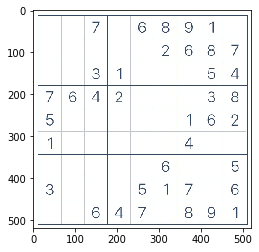

In [4]:
inputImage = imread('testImage.jpg')
plt.imshow(inputImage)

Convert Image to Grayscale

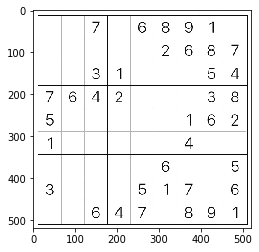

In [5]:
grayImage = 0.21267*inputImage[:,:,0] + 0.715160*inputImage[:,:,1] + 0.072169*inputImage[:,:,2]
grayImage = np.uint8(grayImage)
plt.imshow(grayImage, cmap='gray')

Binary Thresholding

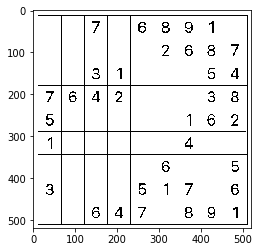

In [30]:
thresholdvalue = 240
TF_matrix = (grayImage > thresholdvalue)
threshold = TF_matrix * 1
plt.imshow(threshold, cmap='gray')

Trimming edges off the Image

In [32]:
# Finding top
topPixel = -1
for i in range(int(threshold.shape[0]/2)):
    if threshold[i, int(threshold.shape[1]/2)] == 0:
        topPixel = i
        break

# Finding bottom
bottomPixel = -1
for i in range(threshold.shape[0] - 1, int(threshold.shape[0]/2), -1):
    if threshold[i, int(threshold.shape[1]/2)] == 0:
        bottomPixel = i
        break

# Finding left
leftPixel = -1
for i in range(int(threshold.shape[1]/2)):
    if threshold[int(threshold.shape[0]/2), i] == 0:
        leftPixel = i
        break

# Finding right
rightPixel = -1
for i in range(threshold.shape[1] - 1, int(threshold.shape[1]/2), -1):
    if threshold[int(threshold.shape[0]/2), i] == 0:
        rightPixel = i
        break

if topPixel < 0 or bottomPixel < 0 or leftPixel < 0 or rightPixel < 0:
    print('Unable to find edge of sudoku.')
    sys.exit(0)

trimmedImage = threshold[topPixel:bottomPixel, leftPixel:rightPixel]

Identifying each Blocks Digit

In [15]:
model = tf.keras.models.load_model('trainedModel.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [45]:
sudokuNumbers = ''

# Iterate through each block
blockWidth = int((trimmedImage.shape[1])/9)
blockHeight = int((trimmedImage.shape[0])/9)
for i in range(9):
    for j in range(9):
        blockImage = trimmedImage[i*blockHeight:(i+1)*blockHeight, j*blockWidth:(j+1)*blockWidth]
        zoomedBlock = cv2.resize(blockImage[4:blockHeight - 4, 4:blockWidth - 4], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
        # Check if block is empty
        if len(np.unique(zoomedBlock)) == 1:
            sudokuNumbers = sudokuNumbers + '0'
        else:
            # print(zoomedBlock)
            print(model.predict([[[zoomedBlock]]]))

NameError: name 'cv2' is not defined